# Using Bag of Words for Natural Language processing

## Spam classification use case

In [1]:
import pandas as pd
import numpy as np


#### Loading the csv

In [2]:
df = pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.loc[4,'Message']

"Nah I don't think he goes to usf, he lives around here though"

In [4]:
df.shape

(5572, 2)

#### How many classes do we have?

In [5]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

#### Converting class to binary integer

In [6]:
df['spam'] = df['Category']

In [7]:
df.loc[df['spam']=='ham','spam'] = 0
df.loc[df['spam']=='spam','spam'] = 1
df['spam'] = df['spam'].astype(int)

In [8]:
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


### Train-test split

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.Message, df.spam, test_size=0.2)

In [10]:
X_train.head()

5367    Just trying to figure out when I'm suppose to ...
3492                                                  Ok.
662                                Then mum's repent how?
2649    Hi, can i please get a  &lt;#&gt;  dollar loan...
4181    swhrt how u dey,hope ur ok, tot about u 2day.l...
Name: Message, dtype: object

### Let's create our bag of words!

#### CountVectorizer converts a collection of text documents to a matrix of token counts

In [11]:
#turnning sentences into vectors - 0100110101

from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()

X_train_cv = v.fit_transform(X_train.values)
X_train_cv

#sparse matrix number of rows and columns 

<4457x7685 sparse matrix of type '<class 'numpy.int64'>'
	with 59080 stored elements in Compressed Sparse Row format>

In [12]:
v.vocabulary_

{'just': 3836,
 'trying': 6991,
 'to': 6868,
 'figure': 2808,
 'out': 4961,
 'when': 7419,
 'suppose': 6560,
 'see': 5931,
 'couple': 2015,
 'different': 2290,
 'people': 5096,
 'this': 6791,
 'week': 7376,
 'we': 7352,
 'said': 5821,
 'get': 3088,
 'together': 6879,
 'but': 1556,
 'didn': 2279,
 'set': 5982,
 'dates': 2149,
 'ok': 4864,
 'then': 6764,
 'mum': 4593,
 'repent': 5656,
 'how': 3486,
 'hi': 3394,
 'can': 1608,
 'please': 5199,
 'lt': 4200,
 'gt': 3229,
 'dollar': 2375,
 'loan': 4121,
 'from': 2988,
 'you': 7643,
 'll': 4113,
 'pay': 5069,
 'back': 1170,
 'by': 1570,
 'mid': 4417,
 'february': 2772,
 'pls': 5207,
 'swhrt': 6597,
 'dey': 2261,
 'hope': 3455,
 'ur': 7135,
 'tot': 6929,
 'about': 744,
 '2day': 379,
 'love': 4179,
 'miss': 4459,
 'take': 6629,
 'care': 1632,
 'lor': 4158,
 'or': 4924,
 'wan': 7308,
 'me': 4361,
 'go': 3130,
 'look': 4147,
 'ready': 5548,
 'put': 5460,
 'on': 4882,
 'your': 7649,
 'excellent': 2663,
 'sub': 6493,
 'face': 2712,
 'outside': 4971,

In [13]:
v.get_feature_names_out()[7600]

'y87'

In [14]:
type(X_train.values)

numpy.ndarray

In [15]:
X_train_np = X_train_cv.toarray() # we turn our sparse matrix into an array so that we can visualize its first element
X_train_np[0].min()

0

## Model 1: Naive Bayes


In [16]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_cv, y_train)

#the probab. of a label given the word that it has

MultinomialNB()

In [17]:
X_test_cv = v.transform(X_test)

In [18]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_cv)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       952
           1       0.98      0.93      0.96       163

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [19]:
sample_test= ['dear Lisa, how are you? I want to sell you a ticket  for the killers']
sample_test_cv = v.transform(sample_test)

In [20]:
 model.predict(sample_test_cv)

array([0])

## Model 2: Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=100, n_estimators=200)

In [22]:
rf.fit(X_train_cv, y_train)

RandomForestClassifier(max_depth=100, n_estimators=200)

In [23]:
y_pred = rf.predict(X_test_cv)

print(classification_report(y_test, y_pred))

#f1 score 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       952
           1       1.00      0.87      0.93       163

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [24]:
emails3 = ['hey mate, you up for a game wiv the lads?']
emails3_count = v.transform(emails3)
rf.predict(emails3_count)

array([0])

## Model 3: Logistic regression

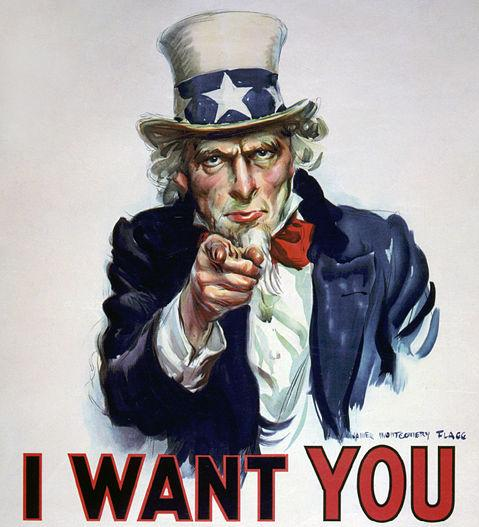

In [25]:
from IPython.display import Image


Image('https://upload.wikimedia.org/wikipedia/commons/c/c0/I_want_you.jpg')
